# Ratkaisut

>[1. Laske invariantti massa](#1)<br>
>[2. Histogrammin piirto](#2)<br>
>[3. Datan valitseminen histogrammiin](#3)<br>
>[4. Tunnista hiukkanen](#4)<br>
>[5. Histogrammien vertailu samassa kuvassa](#5)<br>
>[6. Datan suodattimien vertailu](#6)<br>
>[7. Pseudorapiditeetti](#7)<br>
>[8. Higgsin bosoni](#8)<br>

<a id="1"></a>
## 1. Laske invariantti massa

In [1]:
# Haetaan tarvittavat moduulit. Nimetään pandas-moduuli 'pd'ksi ja numpy-moduuli 'np'ksi, jotta koko nimeä ei
# tarvitse kirjoittaa aina, kun haluamme käyttää jotain funktiota kyseisestä moduulista.
import pandas as pd
import numpy as np

# Haetaan data ja tallennetaan se muuttujaan 'datasetti'. Data voidaan hakea tiedostosta pandas-moduulin
# read_csv() -funktiolla. Sulkeiden sisään kirjoitetaan datatiedoston polku.
datasetti = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zmumu_Run2011A.csv') #('../../Data/Zmumu_Run2011A.csv')

In [2]:
# head() -metodi näyttää datan viisi ensimmäistä riviä. 

datasetti.head()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.432396,2.574210,1,-0.074544,0.499921,34.2464,-0.988480,-0.498704,-1,0.071222,3.42214
1,165617,75138253,24.5872,-2.052200,2.866570,-1,-0.055437,0.000000,28.5389,0.385163,-1.991170,1,0.051477,0.00000
2,165617,75887636,31.7386,-2.259450,-1.332290,-1,0.087917,0.000000,30.2344,-0.468419,1.883310,1,-0.087639,0.00000
3,165617,75779415,39.7394,-0.712338,-0.312266,1,0.058481,0.000000,48.2790,-0.195625,2.970320,-1,-0.049201,0.00000
4,165617,75098104,41.2998,-0.157055,-3.040770,1,-0.030463,1.228040,43.4508,0.590958,-0.042756,-1,0.044175,0.00000


In [3]:
# Laske invariantti massa ja tallenna muuttujana invariantti_massa

invariantti_massa = np.sqrt(2*datasetti.pt1*datasetti.pt2*
                            (np.cosh(datasetti.eta1-datasetti.eta2) - np.cos(datasetti.phi1-datasetti.phi2)))

In [4]:
# Tulosta näytölle muuttujan invariantti_massa viisi ensimmäistä riviä

invariantti_massa.head()

0    89.885744
1    88.810987
2    88.472502
3    90.332620
4    90.514507
dtype: float64

In [5]:
import matplotlib.pyplot as plt

plt.hist(invariantti_massa, bins=60)
plt.title('Kahden myonin invariantti massa')
plt.xlabel('Invariantti massa (GeV)')
plt.ylabel('Tapahtumia/GeV')
plt.show()

<Figure size 640x480 with 1 Axes>

Mitä invariantin massan histogrammi kertoo?
- Histogrammiin on piirretty kahden myonin invariantti massa. Invariantti massa voidaan laskea mille tahansa kahdelle tai useammalle hiukkaselle. Jos hiukkaset ovat peräisin samasta emohiukkasesta, invariantti massa vastaa emohiukkasen massaa. Toisaalta jos hiukkaset eivät ole peräisin samasta hiukkasesta, invariantti massa ei kerro meille mitään. Histogrammissa huomaamme taustahälystä erottuvat piikit emohiukkasina.
<br>

Miksi noin 90 GeV kohdalla on enemmän tapahtumia kuin muualla?
- Z-bosonin massa on noin 90 GeV. Z-bosoni voi hajota kahdeksi myoniksi. Näin ollen, jos kaksi myonia ovat peräisin Z-bosonista, niiden invariantti massa vastaa Z-bosonin massaa. Tällöin piikki erottuu selvästi taustakohinasta.

<a id="2"></a>
## 2 Histogrammin piirto

In [6]:
# Tuo tarvittavat moduulit import-komennolla

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [7]:
# Lue datatiedosto ja tallenna data muuttujaan 'datasetti'.

datasetti = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Ymumu_Run2011A.csv')

In [8]:
# Tulosta tiedoston viisi ensimmäistä riviä (vinkki: käytä head() -metodia)

datasetti.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,75100943,G,6.20385,-4.26661,0.456545,-4.47930,4.29097,-0.91207,3.034990,...,G,9.66898,7.27397,-2.821120,-5.710400,7.80188,-0.678625,-0.369977,1,11.55340
1,165617,75492770,G,16.20100,5.64702,4.154080,14.60530,7.01036,1.48032,0.634236,...,T,4.12495,3.35862,-2.238350,0.844684,4.03616,0.207781,-0.587852,1,9.46937
2,165617,75587682,G,19.28920,-4.21208,-0.651623,18.81210,4.26219,2.19046,-2.988110,...,G,9.82439,4.34394,-0.473505,8.798490,4.36967,1.449670,-0.108575,1,9.16361
3,165617,75167029,G,9.75833,2.39032,-3.782350,8.67145,4.47435,1.41558,-1.007200,...,G,13.56840,-3.39746,5.190980,12.066500,6.20395,1.418750,2.150320,1,10.53910
4,165617,75281957,G,9.63652,1.65156,-5.431330,7.78616,5.67688,1.12134,-1.275600,...,G,7.02632,-1.64493,4.441830,5.188670,4.73663,0.947273,1.925460,-1,10.40790


In [9]:
# Tallenna invariantti massa muuttujaan invariantti_massa

invariantti_massa = datasetti.M

In [10]:
# Selvitä len() -funktion avulla, kuinka monta invariantin massan arvoa data sisältää.

len(invariantti_massa)

37278

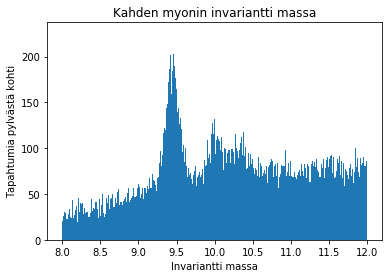

In [11]:
# Piirrä histogrammi

plt.hist(invariantti_massa, bins=500)
plt.title('Kahden myonin invariantti massa')
plt.xlabel('Invariantti massa')
plt.ylabel('Tapahtumia pylvästä kohti')
plt.show()

Mitä invariantin massan histogrammi kertoo?
- Histogrammiin on piirretty kahden myonin invariantti massa. Invariantti massa voidaan laskea mille tahansa kahdelle tai useammalle hiukkaselle. Jos hiukkaset ovat peräisin samasta emohiukkasesta, invariantti massa vastaa emohiukkasen massaa. Toisaalta jos hiukkaset eivät ole peräisin samasta hiukkasesta, invariantti massa ei kerro meille mitään. Histogrammissa huomaamme taustahälystä erottuvat piikit emohiukkasina.
<br>

Mitä tapahtuu noin 9.5 GeV kohdalla?
- Upsilon-mesonin massa on noin 9.5 GeV. Upsilon voi hajota kahdeksi myoniksi. Näin ollen, jos kaksi myonia ovat peräisin Upsilon-mesonista, niiden invariantti massa vastaa Upsilonin massaa. Tällöin piikki erottuu selvästi taustakohinasta.

<a id="3"></a>
## 3. Datan valitseminen histogrammiin

In [12]:
# Tuo moduulit pandas, numpy ja matplotlib.pylab käyttäen import-komentoa

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Lue datatiedosto ja tallenna tiedot muuttujaan 'datasetti'

datasetti = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zmumu_Run2011A_massoilla.csv')

# Tallenna invariantti massa muuttujaan 'invariantti_massa'

invariantti_massa = datasetti.M

Tutki koodin avulla seuraavia asioita:
1. Miten valitun datan määrä vaikuttaa histogrammiin?
    - Mitä enemmän dataa histogrammissa on, sitä luotettavammin voimme sitä tulkita. Pienellä datamäärällä piikki ei vielä välttämättä erotu histogrammista, mutta kun dataa kertyy enemmän, voimme varmemmin todeta, että piikin kohdalla on jotain poikkeavaa.

2. Mitä invariantin massan arvoa datasta löytyy eniten?
    - Eniten tapahtumia on noin 90 GeV kohdalla. 
    
3. Mitä voit päätellä kohdan 2 vastauksestasi?
    - On todennäköisesti olemassa jokin hiukkanen, jonka massa on n. 90 GeV, josta myonit ovat peräisin. (Z-bosonin massa on n. 90 GeV)
    
Bonus: Mitä tapahtuu, jos valitset esimerkiksi 20000 tapahtumaa piirrettäväksi? Miksi?
- Emme voi piirtää 20000 tapahtumaa, koska tiedostossamme on dataa vain 10851 tapahtumasta.

<a id="4"></a>
## 4. Tunnista hiukkanen

In [13]:
# Tuo tarvittavat moduulit import-komennolla

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [14]:
# Lue datatiedosto ja tallenna invarianttien massojen arvot

datasetti = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Jpsimumu_Run2011A.csv')
invariantti_massa = datasetti.M

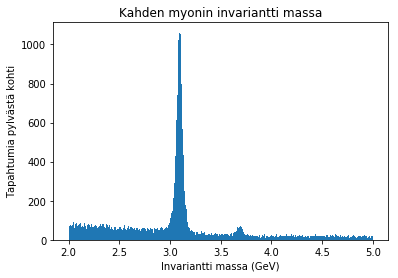

In [15]:
# Piirrä invarianttien massojen histogrammi

plt.hist(invariantti_massa, bins=500)
plt.title('Kahden myonin invariantti massa')
plt.xlabel('Invariantti massa (GeV)')
plt.ylabel('Tapahtumia pylvästä kohti')
plt.show()

Piikki asettuu hieman yli 3 GeV kohdalle, joten tehtävässä olevasta kuvasta voimme päätellä piikin kohdalla olevien myonien olevan peräisin J/psi -hiukkasesta.

<a id="5"></a>
## 5. Histogrammien vertailu samassa kuvassa

In [16]:
# Tuo tarvittavat moduulit

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Lue datatiedosto

datasetti = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Dimuon_DoubleMu.csv')

# Tallenna invariantti massa

invariantti_massa = datasetti.M
datasetti.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


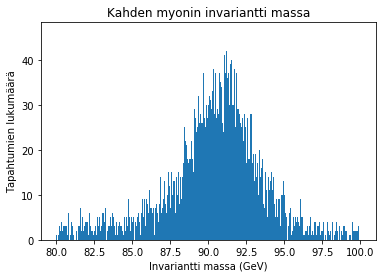

In [17]:
# Piirrä histogrammi ja zoomaa jonkun piikin kohdalle

# Zoomataan välille 80 GeV - 100 GeV
plt.hist(invariantti_massa, bins=500, range=(80,100))
plt.title('Kahden myonin invariantti massa')
plt.xlabel('Invariantti massa (GeV)')
plt.ylabel('Tapahtumien lukumäärä')
plt.show()

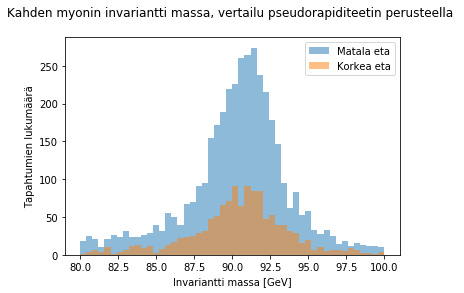

In [18]:
KorkeaEta = datasetti[datasetti.eta1 + datasetti.eta2 > 1.5]
MatalaEta = datasetti[datasetti.eta1 + datasetti.eta2 < 1.5]

plt.xlabel('Invariantti massa [GeV]')
plt.ylabel('Tapahtumien lukumäärä')
plt.title('Kahden myonin invariantti massa, vertailu pseudorapiditeetin perusteella \n')
plt.hist(MatalaEta.M, bins=50, range=(80,100), alpha=0.5, label='Matala eta')
plt.hist(KorkeaEta.M, bins=50, range=(80,100), alpha=0.5, label='Korkea eta')
plt.legend()
plt.show()

Pohdi, mitä näet pseudorapiditeettien kuvaajassa
- Korkealla pseudorapiditeetilla Z-bosonin piikki on paljon epätarkempi kuin matalilla pseudorapiditeetin arvoilla. Tämä johtuu siitä, että pseudorapiditeetti kuvaa myonin etenemissunnan ja alkuperäisen hiukkassuihkun välistä kulmaa. Suurilla pseudorapiditeetin arvoilla hiukkanen on osunut ilmaisimen päätyyn, jolloin mittaustulos on epätarkempi kuin pienillä pseudorapiditeetin arvoilla, jolloin hiukkanen on osunut ilmaisinsylinterin vaippaan.


<a id="6"></a>
## 6. Datan suodattimien vertailu

In [19]:
# Tuo tarvittavat moduulit

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [20]:
# Lue datatiedostot

zee = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zee_Run2011A.csv')
zmumu = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zmumu_Run2011A.csv')

In [21]:
# Laske ja tallenna invariantit massat

m_zee = np.sqrt(2*zee.pt1*zee.pt2*
                            (np.cosh(zee.eta1-zee.eta2) - np.cos(zee.phi1-zee.phi2)))
m_zmumu = np.sqrt(2*zmumu.pt1*zmumu.pt2*
                            (np.cosh(zmumu.eta1-zmumu.eta2) - np.cos(zmumu.phi1-zmumu.phi2)))

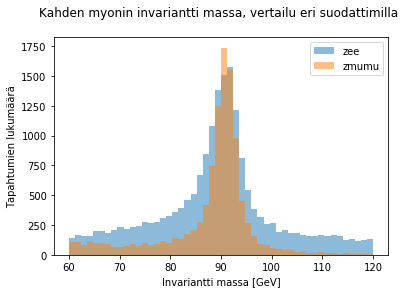

In [22]:
# Piirrä histogrammit

plt.xlabel('Invariantti massa [GeV]')
plt.ylabel('Tapahtumien lukumäärä')
plt.title('Kahden myonin invariantti massa, vertailu eri suodattimilla \n')
plt.hist(m_zee, bins=50, alpha=0.5, label='zee')
plt.hist(m_zmumu, bins=50, alpha=0.5, label='zmumu')
plt.legend()
plt.show()

Minkä hiukkasen hajoamiseen piikki liittyy?
 - Piikki on noin 90 GeV kohdalla, joten kyseessä on Z-bosonin hajoaminen kahdeksi myoniksi tai kahdeksi elektroniksi.
<br>

Mitä piikin muoto kertoo?
 - Mitä kapeampi piikki, sitä tarkempi mittaustulos on.
<br>

Kummassa mittauksessa on vähemmän kohinaa, eli tulos on ns. tarkempi? 
 - Näyttäisi siltä, että zmumu-tiedoston data tuottaa kapeamman ja tarkemman piikin.

<a id="7"></a>
## 7. Pseudorapiditeetti

In [23]:
# Haetaan tarvittavat moduulit.
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Haetaan data.
data = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zmumu_Run2011A_massoilla.csv')

# Luodaan kaksi muuttujaa, "ehto1" ja "ehto2". Asetetaan näihin ehdot suurille ja pienille pseudorapiditeeteille.
# Voit muuttaa karsintaehtoja ja katsoa, miten tapahtumien lukumäärä muuttuu. Valitse kuitenkin sellaiset ehdot,
# että suuren ja pienen pseudorapiditeetin tapahtumia on suurinpiirtein sama määrä.
ehto1 = 1.52
ehto2 = 0.45

# Valitaan datasta ne tapahtumat, jotka toteuttavat ehdon 1
suuri_eta = data[(abs(data.eta1) > ehto1) & (abs(data.eta2) > ehto1)]

# Valitaan datasta ne tapahtumat, jotka toteuttavat ehdon 2
pieni_eta = data[(abs(data.eta1) < ehto2) & (abs(data.eta2) < ehto2)]

# Tulostetaan tiedot valituista tapahtumista.
print("Kaikkien tapahtumien lukumäärä = %d" % len(data))
print("Tapahtumia, joissa kummankin myonin pseudorapiditeetti on suuri = %d" % len(suuri_eta))
print("Tapahtumia, joissa kummankin myonin pseudorapiditeetti on pieni = %d" % len(pieni_eta))

Kaikkien tapahtumien lukumäärä = 10851
Tapahtumia, joissa kummankin myonin pseudorapiditeetti on suuri = 615
Tapahtumia, joissa kummankin myonin pseudorapiditeetti on pieni = 603


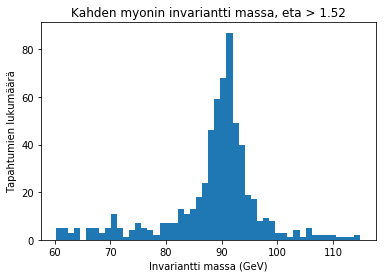

In [24]:
# Piirrä histogrammi

plt.hist(suuri_eta.M, bins=50)
plt.title('Kahden myonin invariantti massa, eta > 1.52')
plt.xlabel('Invariantti massa (GeV)')
plt.ylabel('Tapahtumien lukumäärä')
plt.show()

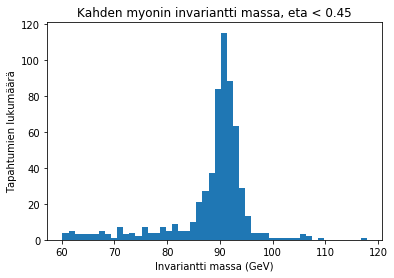

In [25]:
# Piirrä histogrammi

plt.hist(pieni_eta.M, bins=50)
plt.title('Kahden myonin invariantti massa, eta < 0.45')
plt.xlabel('Invariantti massa (GeV)')
plt.ylabel('Tapahtumien lukumäärä')
plt.show()

In [26]:
# Laske pseudorapiditeetti, kun kulma on 30 astetta

theta = 30*2*np.pi/360
eta = -np.log(np.tan(theta/2))
print(eta)

1.3169578969248168


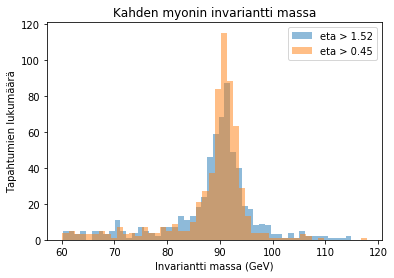

In [27]:
# Piirrä histogrammit samaan kuvaan

plt.hist(suuri_eta.M, bins=50, alpha=0.5, label='eta > 1.52')
plt.hist(pieni_eta.M, bins=50, alpha=0.5, label='eta > 0.45')
plt.title('Kahden myonin invariantti massa')
plt.xlabel('Invariantti massa (GeV)')
plt.ylabel('Tapahtumien lukumäärä')
plt.legend()
plt.show()

Pohdi pseudorapiditeetin vaikutusta CMS-ilmaisimen mittaustarkkuuteen
 - Kuvaajan perusteella pienillä etan arvoilla piikki on hieman kapeampi ja korkeampi, joten mittaus on tällöin tarkempi.

<a id="8"></a>
## 8. Higgsin bosoni

In [28]:
# Tuodaan tarvittavat moduulit.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
# Simuloidut arvot on laskettu invarianttien massojen välille 70-181 GeV.

# Simuloidut arvot Z-bosonin ja jettien hajoamisesta neljäksi leptoniksi.
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])

# Simuloidut arvot huippukvarkin ja antihuippukvarkin hajoamiseen neljäksi leptoniksi.
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])

# Simuloidut arvot kahden Z-bosonin hajoamiseen neljäksi leptoniksi.
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])

# Simuloidut arvot Higgsin bosonin hajoamiseen kahdeksi Z-bosoniksi, jotka hajoavat neljäksi leptoniksi.
# Oletuksena, että Higgsin massa on 125 GeV.
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])

In [30]:
# Luetaan datatiedostot valmiiksi myöhempää käyttöä varten. 
# Data on jaettu eri tiedostoihin sen perusteella, miltä vuodelta se on sekä mitä hiukkasia on syntynyt.
# Esimerkiksi tiedosto 4mu_2011.csv sisältää vuonna 2011 mitattuja tapahtumia, joissa on syntynyt 4 myonia.

csvs = [pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/4mu_2011.csv'),
        pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/4e_2011.csv'), 
        pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/2e2mu_2011.csv')]
csvs += [pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/4mu_2012.csv'),
         pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/4e_2012.csv'), 
         pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/2e2mu_2012.csv')]

# Yhdistetään csv-tiedostot yhdeksi ketjuksi.
fourlep = pd.concat(csvs)

In [31]:
# Määritellään histogrammien piirtoa varten
#     rmin, rmax: minimi- ja maksimialueet invariantille massalle.
#     nbins:      pylväiden lukumäärä
#     width:      pylväiden leveys
#     center:     pylvään keskikohta
# Tutkitaan invarianttien massojen aluetta välillä 70-181 GeV. Valitaan pylväiden määräksi mielivaltaisesti 37.

rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(fourlep['M'], bins = nbins, range = (rmin,rmax))
hist, bins = M_hist

width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

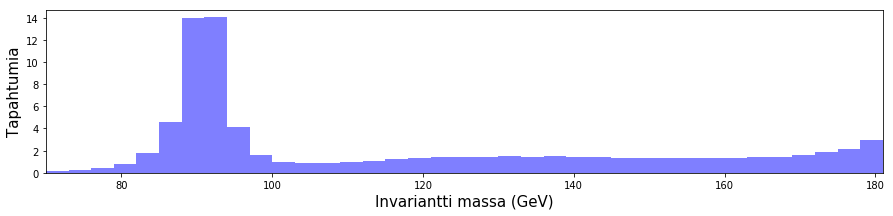

In [32]:
# Piirretään pylväsdiagrammi simuloiduista arvoista, joissa kaksi Z-bosonia hajoaa neljäksi leptoniksi.

plt.figure(figsize = (15,3))
# Alla olevassa koodissa 'zz' määrittää, mitkä simuloidut arvot haluamme piirtää.
plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black', alpha = 0.5)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

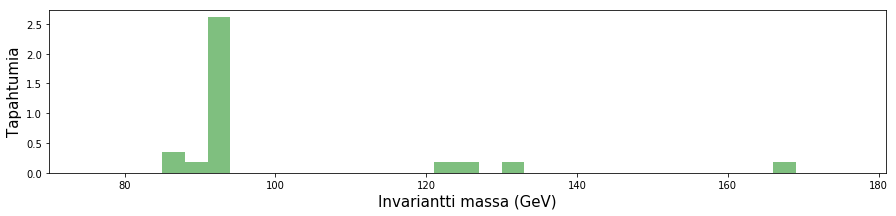

In [33]:
# Piirrä pylväsdiagrammi simuloiduista arvoista, joissa yksi Z-bosoni ja jetit hajoavat neljäksi leptoniksi (dy).
# Käytä pylväsdiagrammissa jotain muuta väriä kuin aiemmin, esimerkiksi vihreä 'g' tai harmaa 'grey'.

plt.figure(figsize = (15,3))
plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black', alpha = 0.5)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

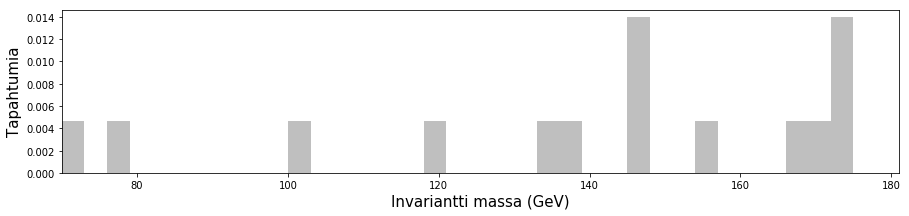

In [34]:
# Piirrä pylväsdiagrammi simuloiduista arvoista, joissa huippu- ja antihuippukvarkki hajoavat neljäksi leptoniksi (ttbar).
# Käytä pylväsdiagrammissa jotain muuta väriä kuin aiemmin, esimerkiksi vihreä 'g' tai harmaa 'grey'.

plt.figure(figsize = (15,3))
plt.bar(center, ttbar, align = 'center', width = width, color = 'grey', linewidth = 0, edgecolor = 'black', alpha = 0.5)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

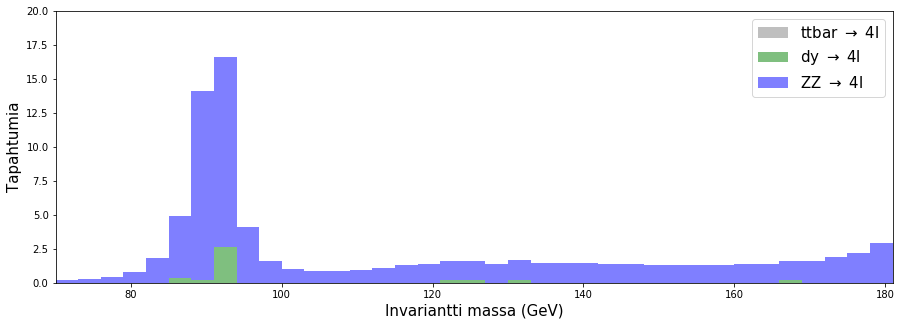

In [35]:
plt.figure(figsize = (15,5))

# ttbar
tt_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'grey', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, label = r'ttbar $\rightarrow$ 4l')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = r'dy $\rightarrow$ 4l')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')


plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.ylim(0,20)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

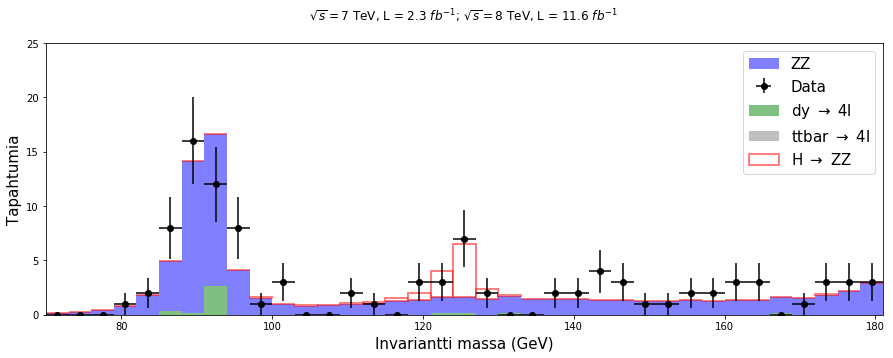

In [36]:
# Piirrä pylväsdiagrammit kaikista simulaatioista mukaan lukien Higgsin bosonin simulaatio, 
# sekä lisää mukaan vielä oikea mittausdata.

# Piirretään oikea data ja simulaatiot samaan kuvaan.

plt.figure(figsize = (15,5))

# Virherajat
xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ')

# Mittaukset.
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')
# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = r'dy $\rightarrow$ 4l')

# ttbar
tt_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'grey', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, label = r'ttbar $\rightarrow$ 4l')

# hzz
hzz_bar = plt.bar(center, hzz, align = 'center', width = width, color = 'white', linewidth = 2, edgecolor = 'red',
                 alpha = 0.5, bottom=ttbar+dy+zz, label = r'H $\rightarrow$ ZZ')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

Mitä voit päätellä tuloksista?
 - Huomaamme, että mittausdata vastaa paljon paremmin simulaatioita, kun oletamme Higgsin bosonin, jonka massa on noin 125 GeV.
<br>

Vastaavatko saamasi tulokset CMS:n analyysiä?
 - Käyttämämme menetelmä on hieman karkeampi kuin CMS:n analyysissä, mutta silti tulokset vastaavat melko hyvin toisiaan.